In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
home_dir = '/home/hpcgies1/Masters-Thesis/AttemptFour/'
eval_dir = f'{home_dir}/Log/'
eval_dir2 = '/home/hpcgies1/rds/hpc-work/NIC/Log/'
models = os.listdir(eval_dir)
print(models)

df_regions = pd.read_csv("~/Masters-Thesis/AttemptFour/TrainData/unique_regions_list.csv")

['all_subjects_baseline', 'subject_5_baseline2', 'subject_1_baseline', 'subject_1_layer_norm', 'subject_7_baseline2', 'subject_1_baseline2', 'subject_2_dot_product', 'subject_2_baseline2', 'all_subjects', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_2_lc_baseline', 'subject_1_and_2', 'all_subjects_3', 'subs_1_2_5_7', 'subject_2_lstm_layer_norm', 'subject_2_attn_loss', 'subject_2_layer_norm', 'subject_2_both_layer_norm', 'all_subjects_2', 'all_subjects_naive', 'all_subjects_dot_product']


In [3]:
def load_data(fname, mean=True):
    with open(fname, "rb") as f:
        data = np.load(f)
    data = np.squeeze(data, axis=-1)
    if mean:
        return np.mean(data, axis=(0,1))
    else:
        return data

In [5]:
data = {}
for i, m in enumerate(models):
    p = glob.glob(f"{eval_dir}/{m}/eval_out/attention_scores_*")
    try:
        if p != []:
            data[m] = load_data(p[0])
    except ValueError:
        print("failed for model", m)

for k,v in data.items():
    print(k, v.shape)

failed for model subject_2_dot_product
failed for model all_subjects_dot_product
all_subjects_baseline (4120, 15, 360)
subject_5_baseline2 (515, 15, 360)
subject_1_baseline (515, 15, 360)
subject_7_baseline2 (515, 15, 360)
subject_1_baseline2 (515, 15, 360)
subject_2_baseline2 (515, 15, 360)
all_subjects (4120, 15, 360)
subject_2_attn_layer_norm (515, 15, 360)
subject_2_dense_layer_norm (515, 15, 360)
subject_1_and_2 (2, 515, 15, 360)
subject_2_lstm_layer_norm (515, 15, 360)
subject_2_layer_norm (515, 15, 360)
subject_2_both_layer_norm (515, 15, 360)


In [52]:
def get_attn_file(log_dir, model_name):
    files = glob.glob(f"{log_dir}/{model_name}/eval_out/attention_*")
    return files[0]

sub1 = load_data(get_attn_file(eval_dir2, "subject_1_layer_norm"), True) 
sub2 = load_data(get_attn_file(eval_dir, "subject_2_both_layer_norm"), True)
sub5 = load_data(get_attn_file(eval_dir2, "subject_5_layer_norm"), True)
sub7 = load_data(get_attn_file(eval_dir2, "subject_7_layer_norm"), True)
batch_subs = load_data(get_attn_file(eval_dir2, "torch_alt_batches"), True)

In [5]:
all_subs = np.squeeze(np.load(f"{eval_dir2}/torch_alt_batches/eval_out/attention_scores_8.npy"), -1) 
# 8, 515, 15, 360

In [49]:
def idx_to_region(idx: int):
    """
    idx: int [0, 360)
    """
    return df_regions.iloc[idx].regionLongName, df_regions.iloc[idx].regionName, df_regions.iloc[idx].region
idx_to_region(0)
idx_to_region(142)

('Area_PGp_L', 'PGp_L', 'PGp')

## All subjects (sep enc)

In [9]:
all_subs = np.mean(all_subs, axis=(1,2)) # [8, 360]

(8, 360)

In [18]:
all_subs_idx = np.argsort(all_subs, axis=1)[::-1]

In [48]:
def f(s):
    s = s.replace("_", " (") 
    s += ")"
    return s

def ff(s):
    s = s.replace("_R", "")
    s = s.replace("_L", "")
    return s

## Get the top-10 regions for each subject
top_regions = []
for i in range(8):
    tr = []
    t = np.argsort(all_subs[i])[::-1]
    for i in range(10):
        tr.append( ff(idx_to_region(t[i])[1]) )
#         tr.append( idx_to_region(t[i])[0] )
    top_regions.append(tr)

print(" & ".join(list(f"Subj. {i}" for i in range(1, 9))))
for i in range(10):
    temp = []
    for j in range(8):
        temp.append(top_regions[j][i])
    ss = " & ".join(temp)
    ss += " \\\\"
    print(ss)
    

Subj. 1 & Subj. 2 & Subj. 3 & Subj. 4 & Subj. 5 & Subj. 6 & Subj. 7 & Subj. 8
V8 & V8 & LO3 & LO3 & VVC & VMV3 & MT & V8 \\
MT & MT & VMV3 & LO1 & V8 & VMV1 & V7 & VMV1 \\
V8 & LO3 & V8 & LO2 & V6 & V4t & MST & V4t \\
LO3 & FFC & TPOJ3 & V4t & V4t & V8 & TE2p & MST \\
VVC & MST & FFC & V8 & FFC & PIT & DVT & VVC \\
FFC & PHA2 & TE2p & MST & FFC & LO2 & VVC & PHA3 \\
V4t & VVC & MST & V8 & PHA3 & V8 & V4t & TE2p \\
VMV2 & TPOJ3 & TE2p & FST & V7 & VMV2 & TPOJ2 & FFC \\
PGp & PHA3 & LO2 & VMV2 & LO2 & FFC & PGp & LO3 \\
MST & VMV3 & MT & TPOJ2 & VMV2 & FFC & PHA1 & MT \\


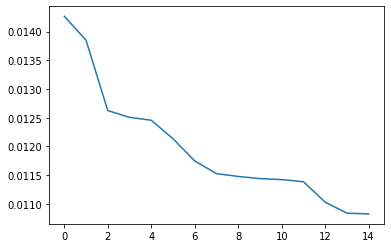

In [43]:
# x1 = data['subject_2_baseline2']
# x1 = data['subject_2_both_layer_norm']
# x1 = data['subject_2_baseline2']
x1 = sub2
# x1 = np.mean(x1, axis=(0,1))
x1_idx = np.argsort(x1)[::-1]
x1 = x1[x1_idx]
plt.plot(x1[:15])
plt.show()

In [54]:
def sort_(x):
    # Sort
    assert x.ndim == 1
    return np.argsort(x)[::-1]

x1 = sort_(sub1)
x2 = sort_(sub2)
x5 = sort_(sub5)
x7 = sort_(sub7)

def f(s):
    s = s.replace("_", " (") 
    s += ")"
    return s

print(f"{'sub 1':7} & {'sub 2':7} & {'sub 5':7} & {'sub 7':7}")
print("-----------------------------------------")
for i in range(20):
    print(f"{f(idx_to_region(x1[i])[1]):7} & {f(idx_to_region(x2[i])[1]):7} & {f(idx_to_region(x5[i])[1]):7} & {f(idx_to_region(x7[i])[1]):7} \\\\")
    print(f"\\hline")

sub 1   & sub 2   & sub 5   & sub 7  
-----------------------------------------
TE1p (R) & PGp (L) & V7 (R)  & MT (L)  \\
\hline
LO3 (L) & TPOJ3 (L) & TPOJ2 (L) & PGp (L) \\
\hline
PGp (L) & FFC (L) & LO2 (L) & V7 (R)  \\
\hline
TGv (L) & TE2p (R) & FST (L) & MST (L) \\
\hline
VMV1 (L) & LO3 (L) & V6 (L)  & V4t (L) \\
\hline
V8 (L)  & V8 (R)  & VVC (L) & TPOJ2 (L) \\
\hline
V3CD (L) & V7 (R)  & VMV2 (L) & FFC (L) \\
\hline
TPOJ3 (L) & PHA3 (R) & V8 (R)  & TE2p (R) \\
\hline
V8 (R)  & VMV3 (L) & PGp (L) & VVC (R) \\
\hline
H (R)   & MT (L)  & PH (L)  & PHT (L) \\
\hline
VVC (L) & FFC (R) & V6A (L) & VVC (L) \\
\hline
LO2 (L) & H (R)   & V8 (L)  & PHA3 (R) \\
\hline
V4t (L) & PH (L)  & FFC (L) & PHA1 (L) \\
\hline
PH (R)  & MST (L) & TPOJ3 (L) & PH (L)  \\
\hline
MT (L)  & TPOJ2 (L) & PHA3 (R) & V8 (R)  \\
\hline
V3A (R) & STGa (L) & OFC (L) & LO2 (L) \\
\hline
PHT (R) & VVC (R) & H (R)   & PHA3 (L) \\
\hline
VMV2 (L) & VMV3 (R) & V4t (L) & TPOJ3 (L) \\
\hline
FST (L) & PHA2 (R) & PIT (L

In [18]:
for i in range(0,15):
#     i *= -1
    print(f"{i+1:02} - {x1[i]:.3f} -", idx_to_region(x1_idx[i])[0])

01 - 0.014 - Area_TE1_posterior_R
02 - 0.012 - Area_Lateral_Occipital_3_L
03 - 0.012 - Area_PGp_L
04 - 0.012 - Area_TG_Ventral_L
05 - 0.012 - VentroMedial_Visual_Area_1_L
06 - 0.012 - Eighth_Visual_Area_L
07 - 0.011 - Area_V3CD_L
08 - 0.011 - Area_TemporoParietoOccipital_Junction_3_L
09 - 0.011 - Eighth_Visual_Area_R
10 - 0.011 - Hippocampus_R
11 - 0.011 - Ventral_Visual_Complex_L
12 - 0.011 - Area_Lateral_Occipital_2_L
13 - 0.011 - Area_V4t_L
14 - 0.010 - Area_PH_R
15 - 0.010 - Middle_Temporal_Area_L


In [23]:
x1 = np.mean(data['all_subjects_baseline'], axis=(0,1))
x1_idx = np.argsort(x1)[::-1]
x1 = x1[x1_idx]

x2 = np.mean(data['subject_2_baseline2'], axis=(0,1))
x2_idx = np.argsort(x2)[::-1]
x2 = x2[x2_idx]

# x3 = np.mean(data['subject_5_baseline'], axis=(0,1))
# x3_idx = np.argsort(x3)[::-1]
# x3 = x3[x3_idx]

print(x1_idx[:2])

# print(x1_idx[:35])
# with open(f"{home_dir}/TrainData/top_regions_baseline_sub2.txt", "w") as f:
#     for i in x1_idx:
#         f.write(f"{int(i)}\n")

def clean_name(name: str):
    name = name.split("_")
    name[-1] = f"({name[-1]})"
    return " ".join(name)

print("Subject 2 & All subjects \\\\")
for i in range(15):
#     i = i + 1
#     print(f"{clean_name(idx_to_region(x1_idx[i])[0])} & {clean_name(idx_to_region(x2_idx[i])[0])} & {clean_name(idx_to_region(x3_idx[i])[0])}\\\\")
#     print(f"{clean_name(idx_to_region(x1_idx[i])[0])} \\\\")
    print(f"{clean_name(idx_to_region(x2_idx[i])[0])} & {clean_name(idx_to_region(x1_idx[i])[0])} \\\\")
    print(f"\\hline")

[142 155]
Subject 2 & All subjects \\
Area PGp (L) & Area PGp (L) \\
\hline
Area TE2 anterior (L) & Area V4t (L) \\
\hline
Area TE2 posterior (R) & Area TE2 posterior (R) \\
\hline
Second Visual Area (R) & Area PH (R) \\
\hline
Fusiform Face Complex (L) & Area V3B (R) \\
\hline
Third Visual Area (R) & Second Visual Area (R) \\
\hline
Area TE2 posterior (L) & Area TemporoParietoOccipital Junction 3 (L) \\
\hline
Area TE2 anterior (R) & Fusiform Face Complex (L) \\
\hline
Fusiform Face Complex (R) & Eighth Visual Area (R) \\
\hline
Orbital Frontal Complex (L) & Area TE1 Middle (R) \\
\hline
Dorsal Transitional Visual Area (L) & Third Visual Area (R) \\
\hline
Area TF (R) & Fourth Visual Area (R) \\
\hline
Area TemporoParietoOccipital Junction 3 (L) & Fusiform Face Complex (R) \\
\hline
Area TF (L) & Dorsal Transitional Visual Area (L) \\
\hline
Medial Superior Temporal Area (L) & Ventral Visual Complex (L) \\
\hline


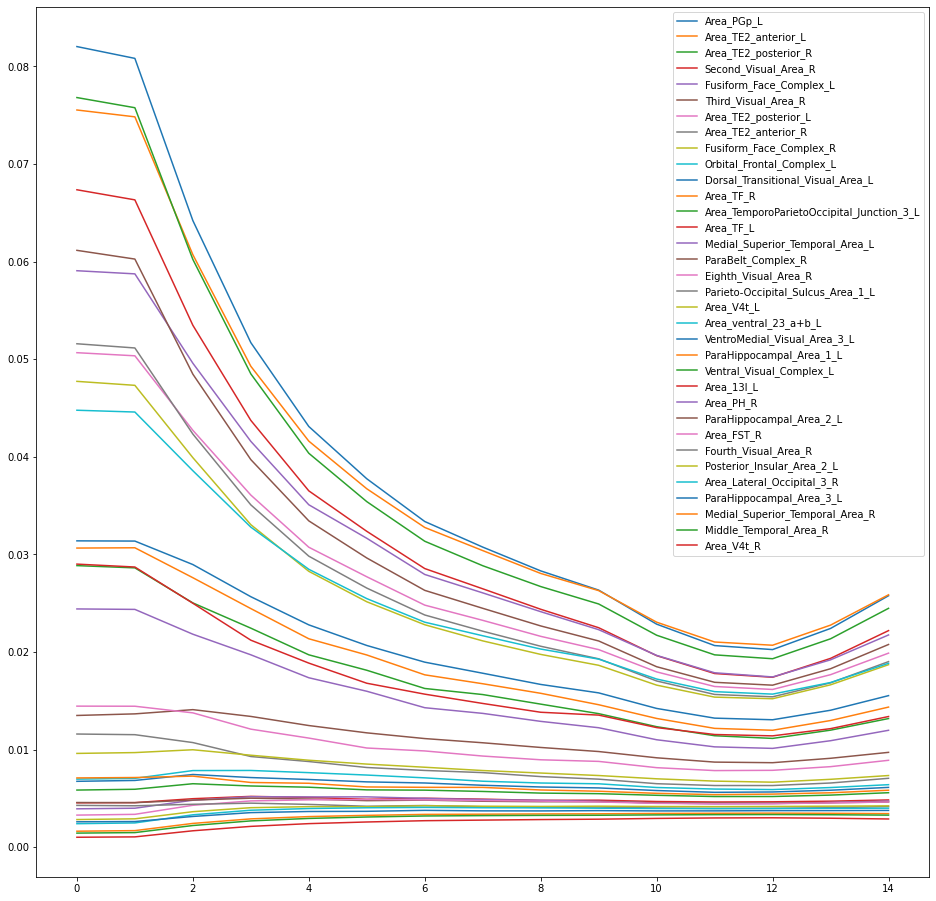

In [8]:
x1 = data['subject_2_baseline2']
x1 = np.mean(x1, axis=0)

# print(idx_to_region(91)[0])
# ofc = 92
# ofc = 0 # VC1
# ofc = 142 # PGp_L

plt.figure(figsize=(16,16))
for i in x1_idx[:34]:
    plt.plot(x1[:,i], label=f'{idx_to_region(i)[0]}')
    
plt.legend()
plt.show()


Area_PGp_L - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6887702/#:~:text=Area%20PGp%20is%20found%20on,of%20the%20inferior%20parietal%20lobule.
    
    This area is also involved in moral decision-making and egocentric/allocentric perspective function.8 Caudal portions of the inferior parietal lobule determine semantic content and assist in the interpretation of meaning within information.4 This region plays a role in memory retrieval
    
Similarly, Area_PGi_L 

    This region shows activity when individuals change their visuospatial attention from one area to another,7 and is a major node in the task-negative network, which mostly functions to redirect attention towards relevant stimuli


In [25]:
idx_to_region(131)

('Area_TE1_anterior_L', 'TE1a_L')